<a href="https://colab.research.google.com/github/tejseth/customer-churn/blob/main/si_485.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import datetime
import warnings
from pandas.core.common import SettingWithCopyWarning
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, brier_score_loss, balanced_accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls /content/gdrive/Shareddrives/'SI 405 Group'

'Customer Churn Dataset U of M 2022-09-23 2.xlsx'
'General Admin Docs'
'Meeting Agenda Notes'
'Midterm Presentation - Group 10.gslides'
'Midterm Presentation.gslides'
'Midterm Report - Group 10.gdoc'
'Progress Reports'
'Project Report (variations)'
'Stand Ups '
'Story Arc .gslides'
'Tech Scope '
 Timeline


In [4]:
df = pd.read_excel('/content/gdrive/Shareddrives/SI 405 Group/Customer Churn Dataset U of M 2022-09-23 2.xlsx')

<ipython-input-4-31a291010ae6>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('/content/gdrive/Shareddrives/SI 405 Group/Customer Churn Dataset U of M 2022-09-23 2.xlsx')


In [5]:
df.shape

(272221, 18)

In [6]:
df.head()

,Date,Customer Key,Customer Since,Customer Expiration Date,Agreement Count,Contract Revenue,Contract Revenue Discounted,Main Equipment Count,Parts Cost,Backline Cost,Total Labor Time,Total Travel Time,Total Labor Cost,Total Travel Cost,Total Service Calls,Total Service Call Escalations,Tenure,Churned
0,2018-01-31,2654,2005-07-31,2040-12-31,1,555.0,555.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0,0,150,0
1,2018-02-28,2654,2005-07-31,2040-12-31,1,555.0,555.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0,0,151,0
2,2018-03-31,2654,2005-07-31,2040-12-31,1,555.0,555.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0,0,152,0
3,2018-04-30,2654,2005-07-31,2040-12-31,1,563.0,563.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0,0,153,0
4,2018-05-31,2654,2005-07-31,2040-12-31,1,506.0,506.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0,0,154,0


In [7]:
df.describe()

,Customer Key,Agreement Count,Contract Revenue,Contract Revenue Discounted,Main Equipment Count,Parts Cost,Backline Cost,Total Labor Time,Total Travel Time,Total Labor Cost,Total Travel Cost,Total Service Calls,Total Service Call Escalations,Tenure,Churned
count,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000,272221.000000
mean,16446.757667,1.191477,2309.049936,2239.299294,54.061895,86.924030,129.628796,0.881656,0.531601,44.082824,41.890169,0.894527,0.008085,58.218506,0.012629
std,6504.135448,1.715335,7949.169364,7462.756740,250.431418,1113.992474,1982.188690,6.550796,2.828226,327.539787,222.864215,6.366588,0.116981,87.885183,0.111669
min,2654.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-104236.705000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12330.000000,1.000000,198.000000,198.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
50%,16586.000000,1.000000,570.000000,569.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
75%,21208.000000,1.000000,1617.000000,1613.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,0.000000
max,30979.000000,120.000000,286506.000000,286506.000000,18479.000000,132811.030000,385767.560000,539.840000,308.100000,26992.000000,24278.280000,734.000000,19.000000,3236.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272221 entries, 0 to 272220
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date                            272221 non-null  datetime64[ns]
 1   Customer Key                    272221 non-null  int64         
 2   Customer Since                  272221 non-null  datetime64[ns]
 3   Customer Expiration Date        272221 non-null  datetime64[ns]
 4   Agreement Count                 272221 non-null  int64         
 5   Contract Revenue                272221 non-null  float64       
 6   Contract Revenue Discounted     272221 non-null  float64       
 7   Main Equipment Count            272221 non-null  int64         
 8   Parts Cost                      272221 non-null  float64       
 9   Backline Cost                   272221 non-null  float64       
 10  Total Labor Time                272221 non-null  float64

In [9]:
df.isna().sum()

Date                              0
Customer Key                      0
Customer Since                    0
Customer Expiration Date          0
Agreement Count                   0
Contract Revenue                  0
Contract Revenue Discounted       0
Main Equipment Count              0
Parts Cost                        0
Backline Cost                     0
Total Labor Time                  0
Total Travel Time                 0
Total Labor Cost                  0
Total Travel Cost                 0
Total Service Calls               0
Total Service Call Escalations    0
Tenure                            0
Churned                           0
dtype: int64

In [10]:
df['Churned'].value_counts()

0    268783
1      3438
Name: Churned, dtype: int64

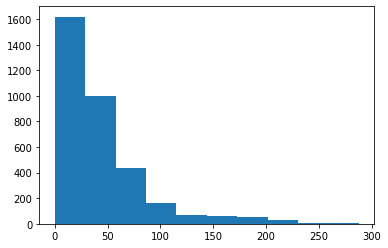

In [11]:
churned_months = df[(df['Churned'] == 1)]
plt.hist(churned_months['Tenure'])
plt.show()

## Cleaning up the Dataset

In [12]:
# Removing all keys where all the values are 0

firsts = df.groupby('Customer Key')['Contract Revenue Discounted'].nth([0]).reset_index()
seconds = df.groupby('Customer Key')['Contract Revenue Discounted'].nth([1]).reset_index()
thirds = df.groupby('Customer Key')['Contract Revenue Discounted'].nth([2]).reset_index()
all = pd.merge(pd.merge(firsts,seconds,on='Customer Key'),thirds,on='Customer Key')
all['sum'] = all['Contract Revenue Discounted_x'] + all['Contract Revenue Discounted_y'] + all['Contract Revenue Discounted']
zeros = all[(all['sum'] == 0)]
zeros_list = list(set(zeros['Customer Key']))

df_non_zeros = df[~df['Customer Key'].isin(zeros_list)]
df_non_zeros.shape

(251839, 18)

## Feature Engineering

In [13]:
df_changed = df_non_zeros.copy()
df_changed['year'] = pd.DatetimeIndex(df_changed['Date']).year
df_changed['crd_change'] = df_changed['Contract Revenue Discounted'] - df_changed.groupby('Customer Key')['Contract Revenue Discounted'].shift(1)
df_changed['equipment_change'] = df_changed['Main Equipment Count'] - df_changed.groupby('Customer Key')['Main Equipment Count'].shift(1)

crd_first = df_changed.groupby('Customer Key')['Contract Revenue Discounted'].first().reset_index().rename(columns = {'Contract Revenue Discounted' : 'crd_first'})
df_changed = pd.merge(df_changed, crd_first, on = 'Customer Key')
df_changed['crd_change_first'] = df_changed['Contract Revenue Discounted'] - df_changed['crd_first']

equipment_first = df_changed.groupby('Customer Key')['Main Equipment Count'].first().reset_index().rename(columns = {'Main Equipment Count' : 'equipment_first'})
df_changed = pd.merge(df_changed, equipment_first, on = 'Customer Key')
df_changed['equipment_change_first'] = df_changed['Main Equipment Count'] - df_changed['equipment_first']

df_changed['churned_next_month'] = df_changed.groupby('Customer Key')['Churned'].shift(-1)

df_changed.head()

,Date,Customer Key,Customer Since,Customer Expiration Date,Agreement Count,Contract Revenue,Contract Revenue Discounted,Main Equipment Count,Parts Cost,Backline Cost,...,Tenure,Churned,year,crd_change,equipment_change,crd_first,crd_change_first,equipment_first,equipment_change_first,churned_next_month
0,2018-01-31,2654,2005-07-31,2040-12-31,1,555.0,555.0,13,0.0,0.0,...,150,0,2018,NaN,NaN,555.0,0.0,13,0,0.0
1,2018-02-28,2654,2005-07-31,2040-12-31,1,555.0,555.0,13,0.0,0.0,...,151,0,2018,0.0,0.0,555.0,0.0,13,0,0.0
2,2018-03-31,2654,2005-07-31,2040-12-31,1,555.0,555.0,13,0.0,0.0,...,152,0,2018,0.0,0.0,555.0,0.0,13,0,0.0
3,2018-04-30,2654,2005-07-31,2040-12-31,1,563.0,563.0,15,0.0,0.0,...,153,0,2018,8.0,2.0,555.0,8.0,13,2,0.0
4,2018-05-31,2654,2005-07-31,2040-12-31,1,506.0,506.0,14,0.0,0.0,...,154,0,2018,-57.0,-1.0,555.0,-49.0,13,1,0.0


In [14]:
df_changed.columns

Index(['Date', 'Customer Key', 'Customer Since', 'Customer Expiration Date',
       'Agreement Count', 'Contract Revenue', 'Contract Revenue Discounted',
       'Main Equipment Count', 'Parts Cost', 'Backline Cost',
       'Total Labor Time', 'Total Travel Time', 'Total Labor Cost',
       'Total Travel Cost', 'Total Service Calls',
       'Total Service Call Escalations', 'Tenure', 'Churned', 'year',
       'crd_change', 'equipment_change', 'crd_first', 'crd_change_first',
       'equipment_first', 'equipment_change_first', 'churned_next_month'],
      dtype='object')

In [15]:
df_changed[(df_changed['Customer Key'] == 2688.0)].sort_values('Tenure')

,Date,Customer Key,Customer Since,Customer Expiration Date,Agreement Count,Contract Revenue,Contract Revenue Discounted,Main Equipment Count,Parts Cost,Backline Cost,...,Tenure,Churned,year,crd_change,equipment_change,crd_first,crd_change_first,equipment_first,equipment_change_first,churned_next_month
228,2018-01-31,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,0.00,0.0,...,165,0,2018,NaN,NaN,2178.0,0.0,15,0,0.0
229,2018-02-28,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,0.00,0.0,...,166,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0
230,2018-03-31,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,0.00,0.0,...,167,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0
231,2018-04-30,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,0.00,0.0,...,168,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0
232,2018-05-31,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,0.00,0.0,...,169,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0
233,2018-06-30,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,0.00,0.0,...,170,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0
234,2018-07-31,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,0.00,0.0,...,171,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0
235,2018-08-31,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,45.00,0.0,...,172,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0
236,2018-09-30,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,75.00,0.0,...,173,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0
237,2018-10-31,2688,2004-04-30,2022-04-30,1,2178.0,2178.0,15,0.00,0.0,...,174,0,2018,0.0,0.0,2178.0,0.0,15,0,0.0


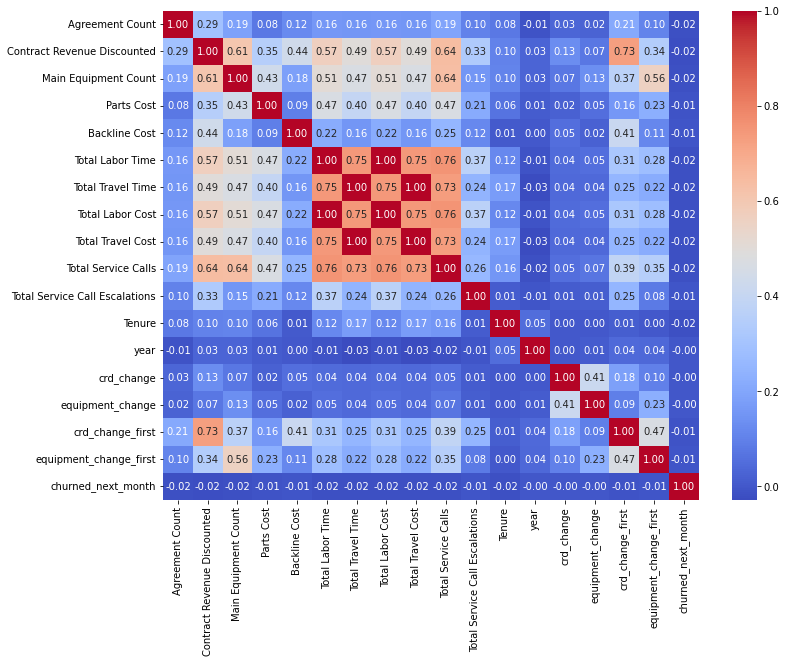

In [16]:
correlation = df_changed[['Agreement Count', 'Contract Revenue Discounted', 'Main Equipment Count', 'Parts Cost',
                        'Backline Cost', 'Total Labor Time', 'Total Travel Time', 'Total Labor Cost',
                        'Total Travel Cost', 'Total Service Calls', 'Total Service Call Escalations',
                        'Tenure', 'year', 'crd_change', 'equipment_change', 'crd_change_first',
                        'equipment_change_first', 'churned_next_month']].corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')
plt.show()

In [17]:
correlation['churned_next_month']

Agreement Count                  -0.019564
Contract Revenue Discounted      -0.023274
Main Equipment Count             -0.019361
Parts Cost                       -0.011037
Backline Cost                    -0.005608
Total Labor Time                 -0.017016
Total Travel Time                -0.020264
Total Labor Cost                 -0.017016
Total Travel Cost                -0.020264
Total Service Calls              -0.020654
Total Service Call Escalations   -0.006256
Tenure                           -0.020853
year                             -0.004552
crd_change                       -0.002942
equipment_change                 -0.001921
crd_change_first                 -0.011457
equipment_change_first           -0.007978
churned_next_month                1.000000
Name: churned_next_month, dtype: float64

In [18]:
df_changed.columns

Index(['Date', 'Customer Key', 'Customer Since', 'Customer Expiration Date',
       'Agreement Count', 'Contract Revenue', 'Contract Revenue Discounted',
       'Main Equipment Count', 'Parts Cost', 'Backline Cost',
       'Total Labor Time', 'Total Travel Time', 'Total Labor Cost',
       'Total Travel Cost', 'Total Service Calls',
       'Total Service Call Escalations', 'Tenure', 'Churned', 'year',
       'crd_change', 'equipment_change', 'crd_first', 'crd_change_first',
       'equipment_first', 'equipment_change_first', 'churned_next_month'],
      dtype='object')

In [27]:
# Start here
df_no_ids = df_changed[['Agreement Count', 'Contract Revenue Discounted', 'Main Equipment Count', 
                        'Parts Cost', 'Total Labor Time', 'Total Service Calls', 'Tenure', 'crd_change', 
                        'equipment_change', 'crd_change_first', 'equipment_change_first', 
                        'churned_next_month']].dropna()
df_no_ids.columns

Index(['Agreement Count', 'Contract Revenue Discounted',
       'Main Equipment Count', 'Parts Cost', 'Total Labor Time',
       'Total Service Calls', 'Tenure', 'crd_change', 'equipment_change',
       'crd_change_first', 'equipment_change_first', 'churned_next_month'],
      dtype='object')

In [21]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in sss.split(df_no_ids, df_no_ids['churned_next_month']):
    strat_train_set = df_no_ids.iloc[train_index]
    strat_test_set = df_no_ids.iloc[test_index]

X_train = strat_train_set.drop(columns = ['churned_next_month'])
Y_train = strat_train_set['churned_next_month']
X_test = strat_test_set.drop(columns = ['churned_next_month'])
Y_test = strat_test_set['churned_next_month']

In [22]:
X_train.head(1)

,Agreement Count,Contract Revenue Discounted,Main Equipment Count,Parts Cost,Total Labor Time,Total Service Calls,Tenure,crd_change,equipment_change,crd_change_first,equipment_change_first
217625,1,6095.18,198,0.0,2.0,1,13,0.0,0.0,1600.69,64


In [23]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LR_pred = pd.DataFrame(LR.predict_proba(X_test), columns = ['not_churned', 'churned'])[['churned']]

print('Brier Score: ', brier_score_loss(Y_test, LR_pred))

Brier Score:  0.013140137465774313


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RF_pred = pd.DataFrame(RF.predict_proba(X_test), columns = ['not_churned', 'churned'])[['churned']]

print('Brier Score: ', brier_score_loss(Y_test, RF_pred))

Brier Score:  0.013495418320766827


In [25]:
XGB = XGBClassifier(objective="binary:logistic", random_state=42)
XGB.fit(X_train, Y_train)

XGB_pred = pd.DataFrame(XGB.predict_proba(X_test), columns = ['not_churned', 'churned'])[['churned']]

print('Brier Score: ', brier_score_loss(Y_test, XGB_pred))

Brier Score:  0.011760462033567065


In [26]:
XGB.save_model('xgb_churn')

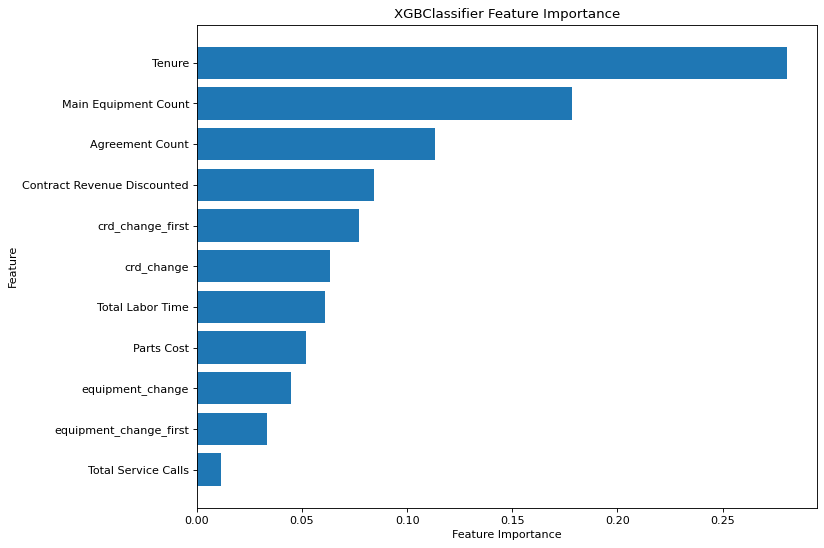

In [ ]:
figure(figsize=(10, 8), dpi=80)
sorted_idx = XGB.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], XGB.feature_importances_[sorted_idx])
plt.title("XGBClassifier Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
make_preds = df_no_ids.drop('churned_next_month', axis = 1)
XGB_total_predictions = pd.DataFrame(XGB.predict_proba(make_preds), columns = ['not_churned', 'churned_pred'])[['churned_pred']]

preds = df_no_ids.reset_index().copy()
preds['churned_pred'] = XGB_total_predictions

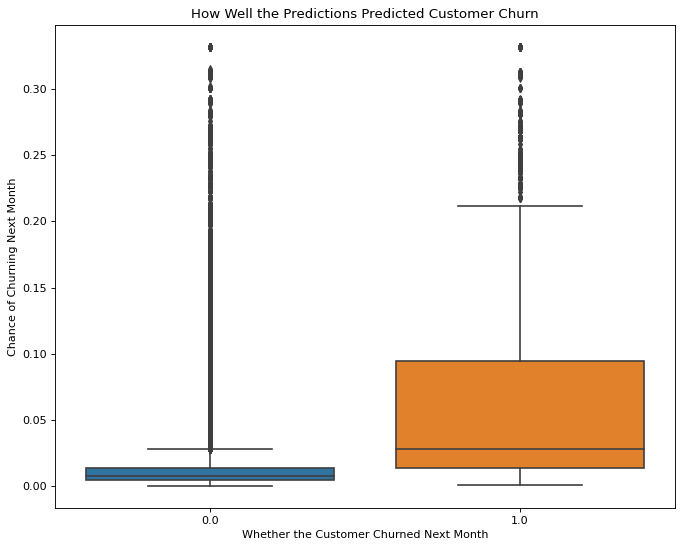

In [ ]:
figure(figsize=(10, 8), dpi=80)
sns.boxplot( x=preds["churned_next_month"], y=preds["churned_pred"])
plt.xlabel("Whether the Customer Churned Next Month")
plt.ylabel("Chance of Churning Next Month")
plt.title("How Well the Predictions Predicted Customer Churn")
plt.show()

In [ ]:
preds.sort_values('churned_pred', ascending = False).head(1)

,index,Agreement Count,Contract Revenue Discounted,Main Equipment Count,Parts Cost,Total Labor Time,Total Service Calls,Tenure,crd_change,equipment_change,crd_change_first,equipment_change_first,churned_next_month,year_2018,year_2019,year_2020,year_2021,year_2022,churned_pred
159590,168203,1,36.0,1,0.0,0.0,0,11,0.0,0.0,0.0,0,0.0,0,1,0,0,0,0.327079


## Building an Expected Months

In [29]:
customers_that_churned = df_changed[(df_changed['Churned'] == 1)]
customers_that_churned = list(set(customers_that_churned['Customer Key']))
churned_df = df_changed[(df_changed['Customer Key'].isin(customers_that_churned))]
month_of_churn = churned_df[(churned_df['Churned'] == 1)].rename(columns = {'Tenure': 'first_tenure'})[['Customer Key', 'first_tenure']]
churned_df = pd.merge(churned_df, month_of_churn, on = 'Customer Key')
churned_df['months_until_churn'] =  churned_df['first_tenure'] - churned_df['Tenure']

In [31]:
df_no_ids = churned_df[['Agreement Count', 'Contract Revenue Discounted', 'Main Equipment Count', 
                        'Parts Cost', 'Total Labor Time', 'Total Service Calls', 'Tenure', 'crd_change', 
                        'equipment_change', 'crd_change_first', 'equipment_change_first', 
                        'months_until_churn']].dropna()
df_no_ids.columns

Index(['Agreement Count', 'Contract Revenue Discounted',
       'Main Equipment Count', 'Parts Cost', 'Total Labor Time',
       'Total Service Calls', 'Tenure', 'crd_change', 'equipment_change',
       'crd_change_first', 'equipment_change_first', 'months_until_churn'],
      dtype='object')

In [38]:
X = df_no_ids.drop(columns = ['months_until_churn'])
y = df_no_ids['months_until_churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
y_train.head()

52535    44
20700    13
20053    29
2356     24
69068     9
Name: months_until_churn, dtype: int64

In [44]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LR_pred = pd.DataFrame(LR.predict(X_test))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, LR_pred))

Mean Squared Error:  139.43949118661644


In [49]:
RF = RandomForestRegressor(max_depth=2, random_state=0)
RF.fit(X_train, y_train)

RF_pred = pd.DataFrame(RF.predict(X_test))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, RF_pred))

Mean Squared Error:  131.08802436615252


In [57]:
XGB = xgb.XGBRegressor(verbosity=0, max_depth = 10) 
XGB.fit(X_train, y_train)

XGB_pred = pd.DataFrame(XGB.predict(X_test))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, XGB_pred))

Mean Squared Error:  38.74887567862953


In [58]:
XGB.save_model('xgb_months')

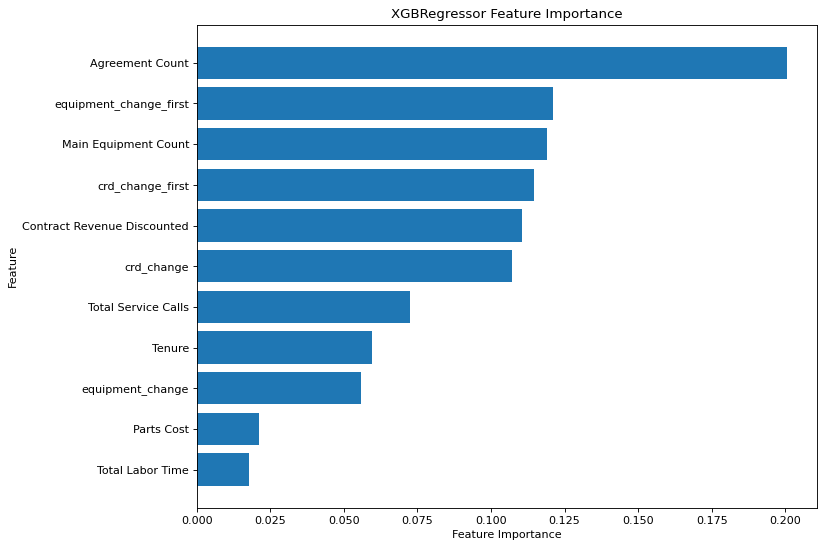

In [59]:
figure(figsize=(10, 8), dpi=80)
sorted_idx = XGB.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], XGB.feature_importances_[sorted_idx])
plt.title("XGBRegressor Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()